> # Natural Language Processing (NLP) in Python
## An introduction to key concepts and techniques

In this notebook we are going to explore central concepts of NLP and their implementation in modern high-level Python libraries.
This is aimed to be a very general introduction to make this field more approacheable and also provide some familiarity with the specific jargon. While NLP offers many opportunities as a technique (or actually an array of different techniques) for social science research the application is yet limited but growing.

The research field of NLP itself has been turn upside-down and developed a lot since the introduction of word embeddings around 2013 and the growth of deep learning (neural network models) in the past 3-4 years. Particularly recurrent neural networks and the LSTM (Long short-term memory) variation shifted the research field.

![nlp problems](https://image.slidesharecdn.com/lang-detect-161011092815/95/nlp-project-full-cycle-16-638.jpg)


This workshop aims at presenting established techniques that I think are most useful in a social science research setting.

To be more specific, below we will explore:

- basic string manipulation
- tokens and tokenization + some preprocessing
- the Bag-of-Words model
- topic modeling (and its close relation to dimensionality reduction / unsupervised machine learning)

### Basic string manipulation and tokenization

In the following we will just juse basic python string manipulation

You can do much much more if you learn using regular expressions (RegEx) but that would go too far - and you can learn some of it in the DC course.

Let's start with a recent news text form the Guardian.

## Installing some packackages that we are going to use

In [1]:
text = """The US Senate has voted to confirm judge Brett Kavanaugh to the supreme court, handing Donald Trump a major victory and America a bench expected to tilt to the right for the next generation.
The president will hold a ceremony for Kavanaugh at the White House on Monday evening and he is expected to take his place on the court on Tuesday.
After a bitter fight on Capitol Hill dominated by partisan entrenchment and the allegations of sexual assault against Kavanaugh, the 53-year-old federal judge was sworn in by supreme court chief justice John Roberts on Saturday evening just a few hours after Republicans won the confirmation vote 50 to 48.
Furious protesters hammered on the huge front doors beneath the white columns of the majestic court building on Capitol Hill as Kavanaugh was being sworn in, following a day of demonstrations that saw many arrested but were more muted than days earlier, as it became clear the ultra-conservative’s confirmation was all but inevitable."""

In [2]:
# We can split the text-chunk into something like sentences.
split_text = text.split('.')
print(split_text)

['The US Senate has voted to confirm judge Brett Kavanaugh to the supreme court, handing Donald Trump a major victory and America a bench expected to tilt to the right for the next generation', '\nThe president will hold a ceremony for Kavanaugh at the White House on Monday evening and he is expected to take his place on the court on Tuesday', '\nAfter a bitter fight on Capitol Hill dominated by partisan entrenchment and the allegations of sexual assault against Kavanaugh, the 53-year-old federal judge was sworn in by supreme court chief justice John Roberts on Saturday evening just a few hours after Republicans won the confirmation vote 50 to 48', '\nFurious protesters hammered on the huge front doors beneath the white columns of the majestic court building on Capitol Hill as Kavanaugh was being sworn in, following a day of demonstrations that saw many arrested but were more muted than days earlier, as it became clear the ultra-conservative’s confirmation was all but inevitable', '']


In [3]:
# print out the first stentence
sentence_3 = split_text[2]
print(sentence_3)


After a bitter fight on Capitol Hill dominated by partisan entrenchment and the allegations of sexual assault against Kavanaugh, the 53-year-old federal judge was sworn in by supreme court chief justice John Roberts on Saturday evening just a few hours after Republicans won the confirmation vote 50 to 48


In [4]:
# Let's create tokens
tokens_sentence_3 = [word for word in sentence_3.split(' ')]
print(tokens_sentence_3)

['\nAfter', 'a', 'bitter', 'fight', 'on', 'Capitol', 'Hill', 'dominated', 'by', 'partisan', 'entrenchment', 'and', 'the', 'allegations', 'of', 'sexual', 'assault', 'against', 'Kavanaugh,', 'the', '53-year-old', 'federal', 'judge', 'was', 'sworn', 'in', 'by', 'supreme', 'court', 'chief', 'justice', 'John', 'Roberts', 'on', 'Saturday', 'evening', 'just', 'a', 'few', 'hours', 'after', 'Republicans', 'won', 'the', 'confirmation', 'vote', '50', 'to', '48']


In [5]:
# Let's lowercase all these tokens and clean up the \n (new line command)
# Also we will replace "()" as well as make sure that only words lend in our list
tokens_sentence_3_lower = [word.lower().strip() for word in sentence_3.split(' ')]
print('### OUTPUT1 ###')
print(tokens_sentence_3_lower)
print('\n')
    
tokens_sentence_3_lower = [word.replace('(','').replace(')','') 
                           for word in tokens_sentence_3_lower if word.isalpha()]

print('### OUTPUT2 ###')
print(tokens_sentence_3_lower)


### OUTPUT1 ###
['after', 'a', 'bitter', 'fight', 'on', 'capitol', 'hill', 'dominated', 'by', 'partisan', 'entrenchment', 'and', 'the', 'allegations', 'of', 'sexual', 'assault', 'against', 'kavanaugh,', 'the', '53-year-old', 'federal', 'judge', 'was', 'sworn', 'in', 'by', 'supreme', 'court', 'chief', 'justice', 'john', 'roberts', 'on', 'saturday', 'evening', 'just', 'a', 'few', 'hours', 'after', 'republicans', 'won', 'the', 'confirmation', 'vote', '50', 'to', '48']


### OUTPUT2 ###
['after', 'a', 'bitter', 'fight', 'on', 'capitol', 'hill', 'dominated', 'by', 'partisan', 'entrenchment', 'and', 'the', 'allegations', 'of', 'sexual', 'assault', 'against', 'the', 'federal', 'judge', 'was', 'sworn', 'in', 'by', 'supreme', 'court', 'chief', 'justice', 'john', 'roberts', 'on', 'saturday', 'evening', 'just', 'a', 'few', 'hours', 'after', 'republicans', 'won', 'the', 'confirmation', 'vote', 'to']


In [6]:
# Removing stopwords

stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
                'ourselves', 'you', "you're", "you've", "you'll", 
                "you'd", 'your', 'yours', 'yourself', 'yourselves', 
                'he', 'him', 'his', 'himself', 'she', "she's", 'her', 
                'hers', 'herself', 'it', "it's", 'its', 'itself', 
                'they', 'them', 'their', 'theirs', 'themselves', 'what', 
                'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 
                'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 
                'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 
                'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
                'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 
                'between', 'into', 'through', 'during', 'before', 'after', 'above', 
                'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 
                'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 
                'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
                'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 
                'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 
                'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 
                'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
                "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
                "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 
                'won', "won't", 'wouldn', "wouldn't"]

In [7]:
tokens_sentence_3_clean = [word for word in tokens_sentence_3_lower if word not in stopwords_en]
print(tokens_sentence_3_clean)

['bitter', 'fight', 'capitol', 'hill', 'dominated', 'partisan', 'entrenchment', 'allegations', 'sexual', 'assault', 'federal', 'judge', 'sworn', 'supreme', 'court', 'chief', 'justice', 'john', 'roberts', 'saturday', 'evening', 'hours', 'republicans', 'confirmation', 'vote']


Introducing NLTK, which will make your life much easier

In [8]:
import nltk

In [9]:
# Tokenizing sentences
from nltk.tokenize import sent_tokenize

# Tokenizing words
from nltk.tokenize import word_tokenize

# Tokenizing Tweets!
from nltk.tokenize import TweetTokenizer

In [10]:
# Let's get our stences.
# Note that the full-stops at the end of each sentence are still there
sentences = sent_tokenize(text)
print(sentences)

['The US Senate has voted to confirm judge Brett Kavanaugh to the supreme court, handing Donald Trump a major victory and America a bench expected to tilt to the right for the next generation.', 'The president will hold a ceremony for Kavanaugh at the White House on Monday evening and he is expected to take his place on the court on Tuesday.', 'After a bitter fight on Capitol Hill dominated by partisan entrenchment and the allegations of sexual assault against Kavanaugh, the 53-year-old federal judge was sworn in by supreme court chief justice John Roberts on Saturday evening just a few hours after Republicans won the confirmation vote 50 to 48.', 'Furious protesters hammered on the huge front doors beneath the white columns of the majestic court building on Capitol Hill as Kavanaugh was being sworn in, following a day of demonstrations that saw many arrested but were more muted than days earlier, as it became clear the ultra-conservative’s confirmation was all but inevitable.']


In [11]:
# Use word_tokenize to tokenize the third sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[2])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(text))
print(unique_tokens)

{'saw', 'became', 'entrenchment', '53-year-old', 'for', 'confirmation', 'many', 'Capitol', 'Roberts', 'doors', 'place', 'columns', 'huge', 'hammered', 'bench', 'Kavanaugh', 'front', 'take', 'sworn', 'Monday', 'America', 'day', 'hours', 'to', 'demonstrations', 'federal', 'at', 'allegations', 'few', 'clear', '48', 'sexual', 'major', 'white', 'Hill', '’', 'is', 'Donald', 'Senate', 'John', 'protesters', 'earlier', 'supreme', 'that', 'as', 'House', 'voted', 'than', 'Republicans', '.', 'all', 'being', 'right', 'US', 'just', 'has', 'bitter', 'was', 'fight', 'in', 'chief', 'by', 'days', 'tilt', 'next', 'and', 'his', 'the', 'vote', 'following', 'court', 'dominated', 'Saturday', 'won', 'were', 'beneath', '50', ',', 'on', 'ultra-conservative', 's', 'after', 'arrested', 'White', 'judge', 'but', 'building', 'muted', 'inevitable', 'Tuesday', 'The', 'generation', 'Furious', 'confirm', 'more', 'evening', 'After', 'it', 'hold', 'he', 'of', 'Trump', 'a', 'partisan', 'assault', 'justice', 'majestic', 'pr

Let's see how this works with teweets using a well known example

In [12]:
tweets = ["On behalf of @FLOTUS Melania & myself, THANK YOU for today's update & GREAT WORK! #SouthernBaptist @SendRelief,… https://t.co/4yZCeXCt6n",
"I will be going to Texas and Louisiana tomorrow with First Lady. Great progress being made! Spending weekend working at White House.",
"Stock Market up 5 months in a row!",
"'President Donald J. Trump Proclaims September 3, 2017, as a National Day of Prayer' #HurricaneHarvey #PrayForTexas… https://t.co/tOMfFWwEsN",
"Texas is healing fast thanks to all of the great men & women who have been working so hard. But still so much to do. Will be back tomorrow!"]

In [13]:
# We can use the tweet tokenizer to parse these tweets:

tknzr = TweetTokenizer()
tweets_tokenized = [tknzr.tokenize(tweet) for tweet in tweets]
print(tweets_tokenized)

[['On', 'behalf', 'of', '@FLOTUS', 'Melania', '&', 'myself', ',', 'THANK', 'YOU', 'for', "today's", 'update', '&', 'GREAT', 'WORK', '!', '#SouthernBaptist', '@SendRelief', ',', '…', 'https://t.co/4yZCeXCt6n'], ['I', 'will', 'be', 'going', 'to', 'Texas', 'and', 'Louisiana', 'tomorrow', 'with', 'First', 'Lady', '.', 'Great', 'progress', 'being', 'made', '!', 'Spending', 'weekend', 'working', 'at', 'White', 'House', '.'], ['Stock', 'Market', 'up', '5', 'months', 'in', 'a', 'row', '!'], ["'", 'President', 'Donald', 'J', '.', 'Trump', 'Proclaims', 'September', '3', ',', '2017', ',', 'as', 'a', 'National', 'Day', 'of', 'Prayer', "'", '#HurricaneHarvey', '#PrayForTexas', '…', 'https://t.co/tOMfFWwEsN'], ['Texas', 'is', 'healing', 'fast', 'thanks', 'to', 'all', 'of', 'the', 'great', 'men', '&', 'women', 'who', 'have', 'been', 'working', 'so', 'hard', '.', 'But', 'still', 'so', 'much', 'to', 'do', '.', 'Will', 'be', 'back', 'tomorrow', '!']]


In [14]:
# Get out all hashtags using loops

hashtags = []

for tweet in tweets_tokenized:
    hashtags.extend([word for word in tweet if word.startswith('#')])
    
print(hashtags)

['#SouthernBaptist', '#HurricaneHarvey', '#PrayForTexas']


### Bag of words model

In order for a computer to understand text we need to somehow find a useful representation.
If you need to compare different texts e.g. articles, you will probably go for keywords. These keywords may come from a keyword-list with for example 200 different keywords
In that case you could represent each document with a (sparse) vector with 1 for "keyword present" and 0 for "keyword absent"
We can also get a bit more sophoistocated and count the number of times a word from our dictionary occurs.
For a corpus of documents that would give us a document-term matrix
![example](https://i.stack.imgur.com/C1UMs.png)

Let's try creating a bag of words model from our initial example.

In [15]:
# We import the Counter module from python's standard collections

from collections import Counter

word_tokenized = word_tokenize(text)
bow = Counter(word_tokenized)
print(bow.most_common())

[('the', 12), ('on', 7), ('to', 6), ('a', 6), ('Kavanaugh', 4), ('court', 4), (',', 4), ('.', 4), ('and', 3), ('of', 3), ('was', 3), ('The', 2), ('judge', 2), ('supreme', 2), ('expected', 2), ('for', 2), ('evening', 2), ('Capitol', 2), ('Hill', 2), ('by', 2), ('sworn', 2), ('in', 2), ('confirmation', 2), ('as', 2), ('but', 2), ('US', 1), ('Senate', 1), ('has', 1), ('voted', 1), ('confirm', 1), ('Brett', 1), ('handing', 1), ('Donald', 1), ('Trump', 1), ('major', 1), ('victory', 1), ('America', 1), ('bench', 1), ('tilt', 1), ('right', 1), ('next', 1), ('generation', 1), ('president', 1), ('will', 1), ('hold', 1), ('ceremony', 1), ('at', 1), ('White', 1), ('House', 1), ('Monday', 1), ('he', 1), ('is', 1), ('take', 1), ('his', 1), ('place', 1), ('Tuesday', 1), ('After', 1), ('bitter', 1), ('fight', 1), ('dominated', 1), ('partisan', 1), ('entrenchment', 1), ('allegations', 1), ('sexual', 1), ('assault', 1), ('against', 1), ('53-year-old', 1), ('federal', 1), ('chief', 1), ('justice', 1), (

In [16]:
# Let's add some preprocessing

from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

word_tokenized = word_tokenize(text)

# lowercasing
cleaned_word_tokenized = [word.lower().strip() for word in word_tokenized]
# replacing some unwanted things
cleaned_word_tokenized = [word.replace('(','').replace(')','') for word in cleaned_word_tokenized if word.isalpha()]
# removing stopwords
cleaned_word_tokenized = [word for word in cleaned_word_tokenized if word not in english_stopwords]

bow = Counter(cleaned_word_tokenized)
print(bow.most_common())

[('kavanaugh', 4), ('court', 4), ('judge', 2), ('supreme', 2), ('expected', 2), ('white', 2), ('evening', 2), ('capitol', 2), ('hill', 2), ('sworn', 2), ('confirmation', 2), ('us', 1), ('senate', 1), ('voted', 1), ('confirm', 1), ('brett', 1), ('handing', 1), ('donald', 1), ('trump', 1), ('major', 1), ('victory', 1), ('america', 1), ('bench', 1), ('tilt', 1), ('right', 1), ('next', 1), ('generation', 1), ('president', 1), ('hold', 1), ('ceremony', 1), ('house', 1), ('monday', 1), ('take', 1), ('place', 1), ('tuesday', 1), ('bitter', 1), ('fight', 1), ('dominated', 1), ('partisan', 1), ('entrenchment', 1), ('allegations', 1), ('sexual', 1), ('assault', 1), ('federal', 1), ('chief', 1), ('justice', 1), ('john', 1), ('roberts', 1), ('saturday', 1), ('hours', 1), ('republicans', 1), ('vote', 1), ('furious', 1), ('protesters', 1), ('hammered', 1), ('huge', 1), ('front', 1), ('doors', 1), ('beneath', 1), ('columns', 1), ('majestic', 1), ('building', 1), ('following', 1), ('day', 1), ('demons

One important part of text preprocessing is normalization. Here we can use stemmers and lematizers to aggregate plural forms and similar. This can be extremely useful if working with languages that have a rich morphology such as Russian or Turkish.

![example_stemm](https://image.slidesharecdn.com/lightweightnaturallanguageprocessingnlp-120314154200-phpapp01/95/lightweight-natural-language-processing-nlp-34-728.jpg?cb=1331814243)

In [17]:
# Let's import a lemmatizer from NLTK and try how it works
from nltk.stem import WordNetLemmatizer

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in cleaned_word_tokenized]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('kavanaugh', 4), ('court', 4), ('judge', 2), ('supreme', 2), ('expected', 2), ('white', 2), ('evening', 2), ('capitol', 2), ('hill', 2), ('sworn', 2)]


So far you learned some basic unicode string manipulation and I also introduced NLTK. If you want to lean more about traditional NLP, check out the [free online book on NLTK](https://www.nltk.org/book/). You will learn old school NLP along with Python (and general programming foundations).

When it comes to comparing documents (this is often what we want), simple "keyword counts" may be too simplistic and sure, we can do better – we can do topic modeling. One amazing library for working with state of the art topic models is Gensim.

![gensim](https://rare-technologies.com/wp-content/uploads/2017/01/atmodel_plot-855x645.png)

Let's try to work with a bigger dataset.

Gensim allows you to work with a large number of high-performant NLP models including word embedding techniques.  We will be using something more traditional: TF-IDF and LSI

In [18]:
# We start by importing the data, ~1900 Abstracts/Titles from Scopus
import pandas as pd

abstracts = pd.read_csv('https://github.com/daniel-hain/SDC_ML_intro_2018/raw/master/notebooks/data/abstracts.csv')

In [19]:
# Let's inspect the data
abstracts.head()

,Title,Link,Abstract
0,Repatriate knowledge transfer: Antecedents and...,https://www.scopus.com/inward/record.uri?eid=2...,"In this study, we build on the ability-motivat..."
1,Institutional pressure and the implementation ...,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: Contemporary frameworks on institutio...
2,"Absorption, combination and desorption: knowle...",https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The purpose of this paper is to theor...
3,Performance implications of organizational amb...,https://www.scopus.com/inward/record.uri?eid=2...,Although ambidexterity is usually cited as a m...
4,Managing technological distance in internal an...,https://www.scopus.com/inward/record.uri?eid=2...,While high technological distance to project p...


**Introducing Lambda Functions** Python allows you to write short functions in one line using the *lambda* keyword with a variable and a ":". 
Below we will transform the abstract column into a new one that we call tokenized compressing our preprocessing pipeline into 3 lines

We combine our lambda functions with the Pandas method "map" that apply this function to every row.

In [20]:
# Tokenize each abstract
abstracts['tokenized'] = abstracts['Abstract'].map(lambda t: word_tokenize(t))

In [21]:
# lowecase, strip and ensure it's words
abstracts['tokenized'] = abstracts['tokenized'].map(lambda t: [word.lower().strip() for word in t if word.isalpha()])

In [22]:
# lemmarize and remove stopwords
abstracts['tokenized'] = abstracts['tokenized'].map(lambda t: [wordnet_lemmatizer.lemmatize(word) for word in t if word not in stopwords_en])

Sure, one could do so much more to pre-process. We could try to identify bi-grams, remove prepositions, verbs etc. But already this brings us rather far.

Now we will dive into Gensim further transform our abstracts using more advanced techniques.

In [23]:
# We start by importing and initializing a Gensim Dictionary. 
# The dictionary will be used to map between words and IDs

from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(abstracts['tokenized'])

In [24]:
# And this is how you can map back and forth
# Select the id for "firm": firm_id
firm_id = dictionary.token2id.get("firm")

# Use computer_id with the dictionary to print the word
print(dictionary.get(firm_id))

firm


In [25]:
# Create a Corpus: corpus
# We use a list comprehension to transform our abstracts into BoWs
corpus = [dictionary.doc2bow(abstract) for abstract in abstracts['tokenized']]

In [26]:
# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[10][:10])

# This is the same what we did before when we were counting words with the Counter (just in big)

[(0, 1), (1, 1), (8, 1), (9, 3), (20, 1), (21, 1), (26, 1), (31, 6), (38, 1), (39, 1)]


In [27]:
# Sort the doc for frequency: bow_doc
bow_doc = sorted(corpus[10], key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:10]:
    print(dictionary.get(word_id), word_count)

firm 12
network 7
knowledge 6
technology 5
absorption 4
inventor 4
characteristic 3
absorb 3
focal 3
invention 3


#### TF-IDF - Term Frequency - Inverse Document Frequency

A token is importan for a document if appears very often
A token becomes less important for comparaison across a corpus if it appears all over the place in the corpus

*Innovation* in a corpus of abstracts talking about innovation is not that important


\begin{equation*}
w_{i,j} = tf_{i,j}*log(\frac{N}{df_i})
\end{equation*}

- $w_{i,j}$ = the TF-IDF score for a term i in a document j
- $tf_{i,j}$ = number of occurence of term i in document j
- $N$ = number of documents in the corpus
- $df_i$ = number of documents with term i


We will use TF-IDF to transform our corpus. However, first we need to fir the TF-IDF model.

In [28]:
# Import the TfidfModel from Gensim
from gensim.models.tfidfmodel import TfidfModel

# Create and fit a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[corpus[10]]

# Print the first five weights
print(tfidf_weights[:5])

[(0, 0.0022581296964183425), (1, 0.037490028883065095), (8, 0.002041286958574039), (9, 0.12500013160592674), (20, 0.047907217955670545)]


In [29]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:10]:
    print(dictionary.get(term_id), weight)

inventor 0.4106158937931975
network 0.2503415366949845
invention 0.2410501115415171
focal 0.23299778249107184
intrafirm 0.2230971905750226
absorption 0.2100826371495165
summary 0.18483857393174158
distant 0.1570309477551384
absorb 0.15470680055365538
speed 0.15068169186283212


In [30]:
# Now we can transform the whole corpus
tfidf_corpus = tfidf[corpus]

The transformed corpus is much more interesting in terms of analysis than the pure bag of words representation. In fact, you could transform it now into a matrix and perform clustering and other unsupervised machine learning.

![surprise](http://www.jaclynfriedman.com/wp-content/uploads/2018/06/giphy-23.gif)

**Surprise**: This is exactly what topic modelling is about! Algorithms like LSI are closely related to PCA, NMF and SVD.



In [31]:
# Just like before, we import the model
from gensim.models.lsimodel import LsiModel

# And we fir it on the tfidf_corpus pointing to the dictionary as reference and the number of topics.
# In more serious settings one would pick between 300-400
lsi = LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)

In [32]:
# Once the model is ready, we can inspect the topics
lsi.show_topics(num_topics=10)

[(0,
  '0.185*"innovation" + 0.172*"knowledge" + 0.167*"firm" + 0.138*"r" + 0.134*"performance" + 0.118*"technology" + 0.118*"capability" + 0.105*"external" + 0.105*"transfer" + 0.104*"learning"'),
 (1,
  '-0.765*"abstract" + -0.644*"available" + 0.004*"r" + 0.004*"performance" + 0.004*"firm" + 0.004*"innovation" + 0.003*"knowledge" + 0.003*"transfer" + 0.003*"effect" + 0.003*"learning"'),
 (2,
  '-0.377*"spillover" + -0.345*"r" + -0.303*"fdi" + -0.214*"foreign" + -0.196*"productivity" + -0.162*"investment" + 0.160*"acap" + -0.148*"domestic" + -0.136*"country" + -0.117*"technology"'),
 (3,
  '0.370*"subsidiary" + -0.361*"r" + -0.355*"alliance" + 0.284*"transfer" + -0.194*"innovation" + 0.182*"fdi" + 0.156*"local" + 0.149*"foreign" + 0.119*"spillover" + 0.112*"country"'),
 (4,
  '0.717*"alliance" + 0.326*"transfer" + -0.190*"ac" + 0.185*"subsidiary" + -0.160*"acap" + -0.159*"innovation" + 0.119*"partner" + 0.113*"technology" + 0.111*"strategic" + 0.088*"portfolio"'),
 (5,
  '-0.676*"aca

In [33]:
# And just as before, we can use the trained model to transform the corpus
lsi_corpus = lsi[tfidf_corpus]

At this point, our corpus is a document-topic matrix. in corpus-format. We can create a full matrix using the built in MatrixSimilarity function (which is actually used for similarity-queries)

In [34]:
# Load the MatrixSimilarity
from gensim.similarities import MatrixSimilarity

# Create the document-topic-matrix
document_topic_matrix = MatrixSimilarity(lsi_corpus)
document_topic_matrix = document_topic_matrix.index

/opt/conda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [35]:
# Let's identify some clusters in our corpus

# We import KMeans form the Sklearn library
from sklearn.cluster import KMeans

# Instatiate a model with 4 clusters
kmeans = KMeans(n_clusters=10)

# And fit it on our matrix
kmeans.fit(document_topic_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
# Let's annotate our abstracts with the assigned cluster number
abstracts['cluster'] = kmeans.labels_

In [38]:
# We can try to visualize our documents using TSNE - an approach for visualizing high-dimensional data

# Import the module first
from sklearn.manifold import TSNE

# And instantiate
tsne = TSNE()

# Let's try to boil down the 100 dimensions into 2
visualization =  tsne.fit_transform(document_topic_matrix)

In [39]:
# Import plotting library
import matplotlib.pyplot as plt
import seaborn as sns

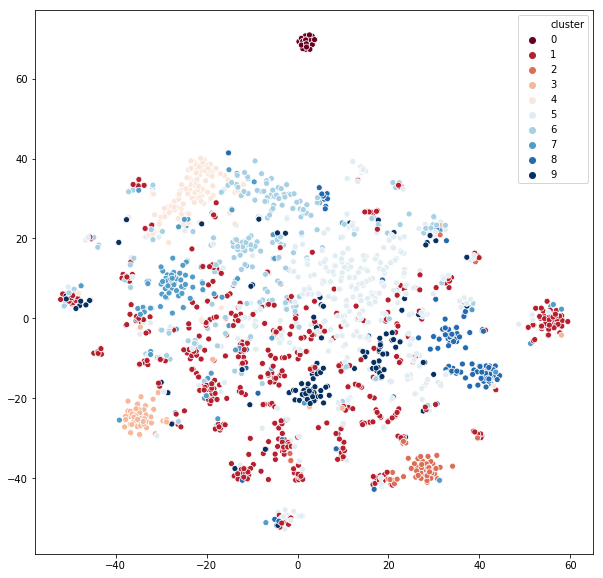

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(visualization[:,0],visualization[:,1], 
                data = abstracts, palette='RdBu', 
                hue=abstracts.cluster, 
                legend='full')

Now let's explore the different clusters. For that we will look at the titles. We could do it "manually" but why not using NLP for that, too.
We will preprocess the titles, just as we did witht he abstracts and then use TF-IDF of the title-token-sum of each cluster to see which tokens are most important in which cluster.

In [41]:
# Preprocessing
abstracts['title_tok'] = abstracts['Title'].map(lambda t: word_tokenize(t))
abstracts['title_tok'] = abstracts['title_tok'].map(lambda t: [word.lower().strip() for word in t if word.isalpha()])
abstracts['title_tok'] = abstracts['title_tok'].map(lambda t: [wordnet_lemmatizer.lemmatize(word) for word in t if word not in stopwords_en])

In [45]:
# Collectiong

Cluster = 4

cluster_titles = []
for x in abstracts[abstracts['cluster'] == Cluster]['title_tok']:
    cluster_titles.extend(x)

In [46]:
# Transfortm into tf_idf format
titles_tfidf = tfidf[dictionary.doc2bow(cluster_titles)]

In [47]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
titles_tfidf = sorted(titles_tfidf, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in titles_tfidf[:20]:
    print(dictionary.get(term_id), weight)

spillover 0.525373445422389
foreign 0.32306944434583
fdi 0.32208038175861453
direct 0.23316345732748348
investment 0.22976242370855537
productivity 0.16380927523061373
evidence 0.16174762125517297
domestic 0.14830266077416826
de 0.13322433948904397
china 0.12063978597574916
growth 0.11914880862899632
en 0.10833521679045374
industry 0.09880582565840462
la 0.09247654667989941
local 0.09049885011684097
economic 0.08591159787857923
technology 0.08334789272256271
affiliate 0.07831809631598448
inward 0.0766299937787249
effect 0.0761092310788412
